In [1]:
import sys
import numpy as np

# Include the parent directory in package searching path.
sys.path.append("../")

from utils import plot_series
from matplotlib import pyplot as plt

np.random.seed(0)

## Inverse CDF Sampling

For a given probability distribution $p(x)$, if we want to directly sample from it, what we need to do is simple. Firstly, compute the Cumulative Density Function, $F(x)$. Then, compute the inverse function of this CFD, $F^{-1}(y)$. Since the domain is $[0, 1]$, we can sample $y_i$ from $Uni(0, 1)$, and obtain $x_i = F^{-1}(y_i)$. In this way, we get $\{x_i\}_{i=1}^{N}$ i.i.d. samples from $p(x)$.

**Limitations:**
- CDF has no close form,
- Inverse function is intractable.

In [2]:
class InverseCDFSampler:
    
    def __init__(self, cdf_inverse, num_samples=100, dim=1):
        """Set up number of samples and the dimension of each sample point."""
        self.inv_cdf = np.vectorize(cdf_inverse)
        self.dim = dim
        self.N = num_samples
    
    def sample(self):
        # Generate random numbers in [0, 1)
        y = np.random.rand(self.N, self.dim)
        
        # Apply CDF inverse to get samples
        x = self.inv_cdf(y)
        
        return x

### Test sampling from two distributions

1. Quadratic function

2. Tent function

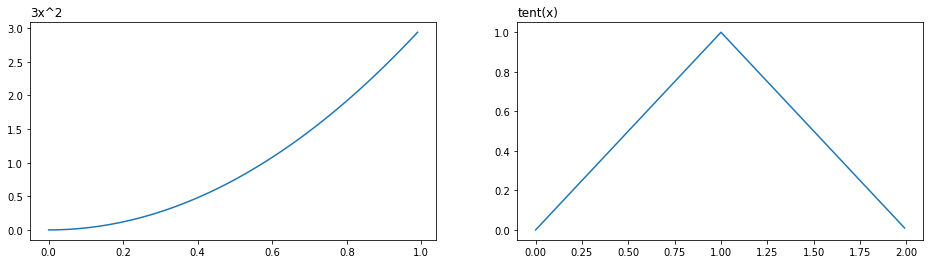

In [3]:
x1 = np.arange(0, 1, .01)
x2 = np.arange(0, 2, .01)

quadratic = np.piecewise(x1, [x1 < 0, (x1 >= 0) * (x1 < 1), x1 >= 1], [0, lambda x1: 3 * np.square(x1), 0])
tent = np.piecewise(x2, [x2 < 0, (x2 < 1) * (x2 > 0), x2 >= 1, x2 > 2], [0, lambda x2: x2, lambda x2: 2 - x2, 0])

plot_series([((x1, quadratic), "3x^2"), ((x2, tent), "tent(x)")])

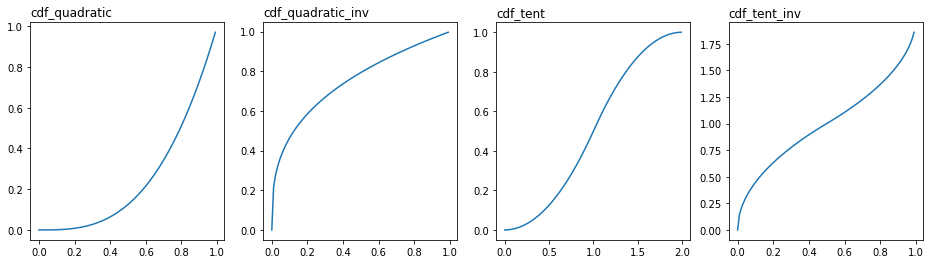

In [4]:
# Calculate the CDF and inverse CDF
cdf_quadratic = np.power(x1, 3)
cdf_tent = np.piecewise(x2, [x2 < 0, (x2 >= 0) * (x2 < 1), x2 >= 1, x2 > 2], [0, lambda x2: 0.5 * np.square(x2), lambda x2: -0.5 * np.square(x2) + 2 * x2 - 1, 1])

def cdf_inv(y):
    if y < 0:
        return 0
    elif 0 <= y < 0.5:
        return np.sqrt(2 * y)
    elif 0.5 <= y <= 1:
        return 2 - np.sqrt(2 - 2 * y)
    else:
        return 0

cdf_inv_quadratic = np.cbrt

y = np.arange(0, 1, .01)

plot_series([((x1, cdf_quadratic), "cdf_quadratic"), ((y, cdf_inv_quadratic(y)), "cdf_quadratic_inv"), ((x2, cdf_tent), "cdf_tent"), ((y, np.vectorize(cdf_inv)(y)), "cdf_tent_inv")])

### Direct sampling and show of results

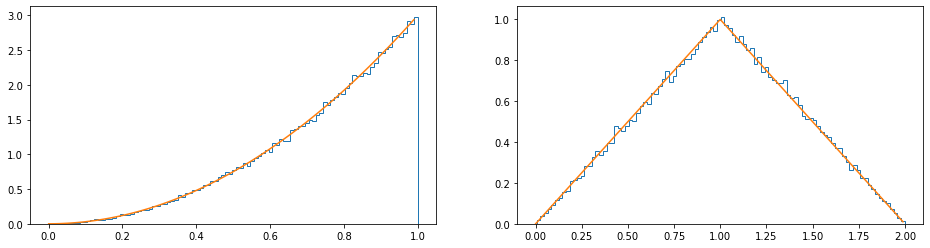

In [5]:
# Sample 100000 data points each and plot them in histograms.
fig, ax = plt.subplots(1, 2)
for idx, (inv_cdf, dist, x) in enumerate(zip((np.cbrt, cdf_inv), (quadratic, tent), (x1, x2))):
    samples = InverseCDFSampler(inv_cdf, num_samples=100000, dim=1).sample()
    counts, bins = np.histogram(samples[:,0], density=True, bins=100)
    ax[idx].stairs(counts, bins)
    ax[idx].plot(x, dist)
fig.set_figwidth(16)